1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import math

In [2]:
roulette = []
for i in range(0, 50):
    x = random.randrange(0, 36, 1)
    roulette.append(x)
print(roulette)

[21, 10, 22, 14, 30, 1, 26, 8, 13, 6, 21, 11, 33, 27, 11, 26, 15, 6, 13, 23, 35, 24, 17, 21, 7, 1, 3, 30, 29, 24, 34, 28, 33, 15, 13, 8, 25, 33, 15, 23, 4, 31, 9, 30, 10, 9, 32, 4, 26, 21]


2. 
1)	Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Докажем, что вероятность произведения двух независимых событий A и B равна произведению вероятностей событий: P(A⋅B) = P(A)⋅P(B).

Для этого сгенерируем вращение колеса рулетки и посчитаем частоту выполнения двух зеро подряд.

После это сравним частоту выпадения двойного зеро в генераторе и по формуле.

In [3]:
roulette = []
# количество зеро
zero_num = 0
# количество выпавших зеро подряд
zero_series = 0
# количество вращений рулетки
series = 1000000
for i in range(0, series):
    x = random.randrange(0, 36, 1)
    if x == 0 and zero_num != 0:
        zero_series += 1
        zero_num += 1
    elif x == 0:
        zero_num += 1
    else:
        zero_num = 0
    roulette.append(x)
#print(roulette)
print(f'Количество выпадения двойных зеро подряд в серии {series} чисел  = {zero_series}')
print(f'Вероятность выпадения двойного зеро подряд в серии {series} чисел = {zero_series/series}')
print('Вероятность выпадения двойного зеро подряд по формуле', round(1/37/37, 7))

Количество выпадения двойных зеро подряд в серии 1000000 чисел  = 791
Вероятность выпадения двойного зеро подряд в серии 1000000 чисел = 0.000791
Вероятность выпадения двойного зеро подряд по формуле 0.0007305


2)	Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

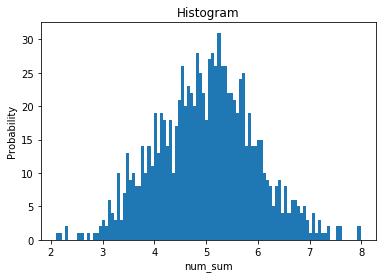

In [4]:
rand_sum = np.zeros(1000)
for i in range(0, 10):
    x = np.random.rand(1000)
    rand_sum += x

num_bins = 100
n, bins, patches = plt.hist(rand_sum, num_bins)
plt.xlabel('num_sum')
plt.ylabel('Probability')
plt.title('Histogram');

3. 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [5]:
k, n = 0, 10
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)
C = math.factorial(n)/math.factorial(k)/math.factorial(n-k)
print(f'C = {C}')
print(f'P = {C /(2 ** n) }')

5 10 0.5
C = 252.0
P = 0.24609375


3. 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [6]:
k, n = 5, 10
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n) # кол-во успехов, кол-во испытаний, вероятность
C = math.factorial(n)/math.factorial(k)/math.factorial(n-k)
print(f'C = {C}')
print(f'P = {C /(2 ** n) }')

9 10 0.9
C = 10.0
P = 0.009765625


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [7]:
k, n = 3, 5
print(k, n, k/n) # кол-во успехов, кол-во испытаний, вероятность
C = math.factorial(n)/math.factorial(k)/math.factorial(n-k)
print(f'C = {C}')
print(f'P = {C /(2 ** n) }')

3 5 0.6
C = 10.0
P = 0.3125


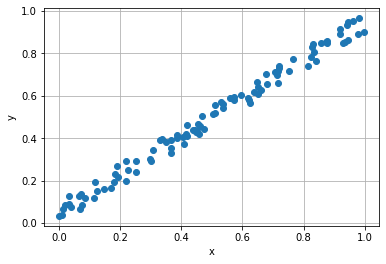

[[1.         0.99394189]
 [0.99394189 1.        ]]


In [8]:
n = 100
r = 0.9
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
c = np.corrcoef(x, y) # нахождение коэфф. коррелиции из бибдиотеки numpy
print(c)

5. Дополните код расчетом коэффициента корреляции x и y по формуле

$\ R = \frac{{}\sum_{i=1}^{n} (x_i - x_m)(y_i - y_m)}
{\sqrt{\sum_{i=1}^{n} (x_i - x_m)^2(y_i - y_m)^2}}$

Средние x и y 0.48549020474131055 0.4881169928168641
Коэффициент корреляции по формуле R =  0.9262784802906594
Коэф корреляции из numpy R =  [[1.         0.92627848]
 [0.92627848 1.        ]]
0.7182899592100476 0.1393942534563505
0.7182899592100477 0.13939425345635031


C:\Users\Alexx\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


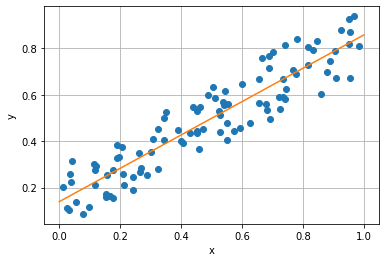

In [9]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

x_avg = np.average(x)
y_avg = np.average(y)
print("Средние x и y", x_avg, y_avg)
R = np.sum((x - x_avg)*(y - y_avg)) / (np.sum((x - x_avg)**2) * (np.sum((y - y_avg)**2)))**0.5
print("Коэффициент корреляции по формуле R = ", R)
print("Коэф корреляции из numpy R = ", np.corrcoef(x, y))

print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show();